In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [2]:
Z0 = range(0, 1000)

In [3]:
noises = [ random.uniform(-1.0, 1.0)*20 for i in Z0 ]               # uniform noises


In [4]:
sinWave = [ 100 * math.sin(2*3.1416*0.002 * Z0[i]) for i in Z0 ]   # Ideal sinewave


In [5]:
Z = [ sinWave[i] + noises[i] for i in Z0 ]    # noisy measurements = Ideal sinewave + noises

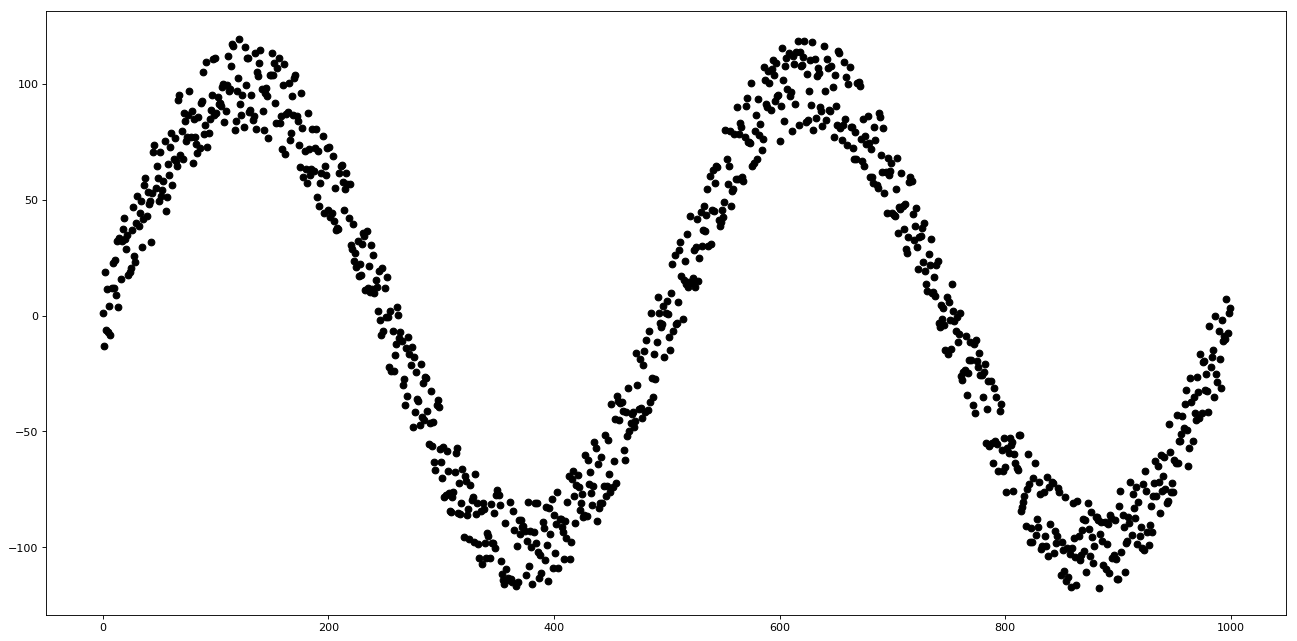

In [6]:
plt.figure(figsize=(20,10), dpi=80)           # plot measurements
plt.plot(Z0, Z, 'ok')

In [7]:
dt = 1

In [8]:
X = np.array([[0.0, 0.0]]).T         # X is 2x1 array, which is [pos, vel].T

In [9]:
P = np.array([[1, 0], [0, 1]])

In [10]:
A = np.array([[1, 1], [0, 1]])

In [11]:
B = np.array([[0.5*dt*dt], [dt]])

In [12]:
u = [random.uniform(-1.0, 1.0)*0.1 for i in Z0]    # external inputs in uniform random dist.

In [13]:
Q = np.array([[0.5, 0], [0, 0.5]])   # prediction noise wk ~ N(0, Q)

In [14]:
H = np.array([1, 0])                 # we have only position observation

In [15]:
R = 5.0                              # measurement noise vk ~ N(0, R)

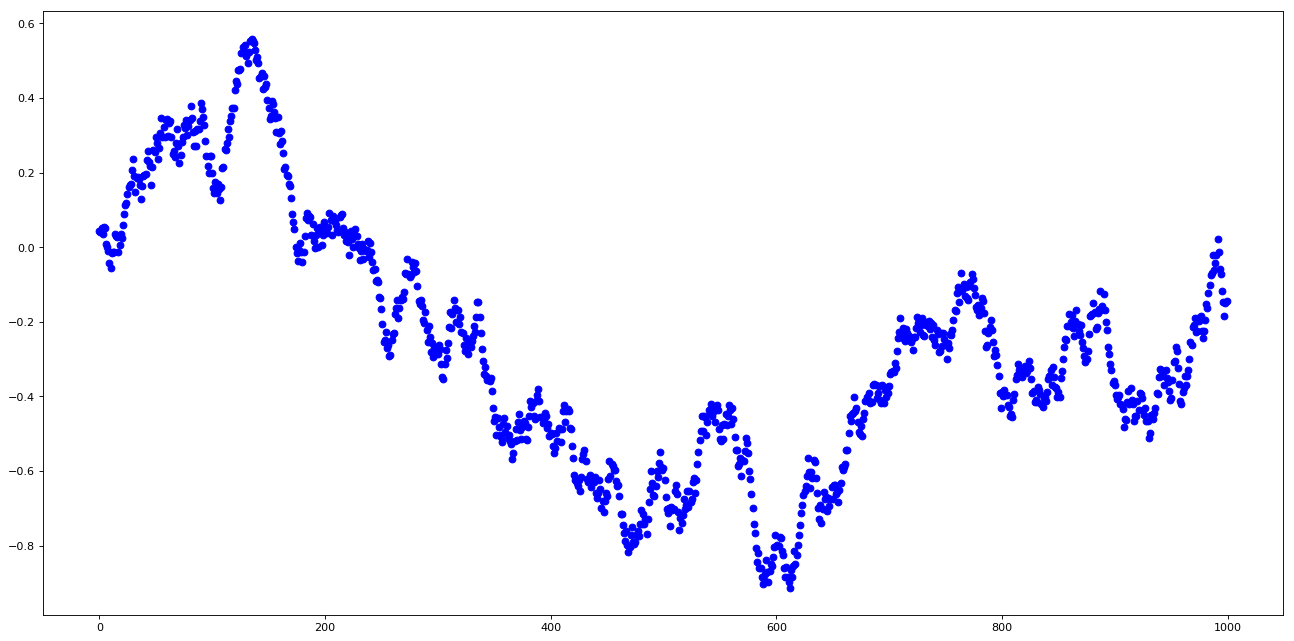

In [16]:
plt.figure(figsize=(20,10), dpi=80)
for i in Z0:
    X_ = A*X + B*u[i]
    P_ = A*P*A.T + Q
    K = P_*H.T/(H*P_*H.T + R)
    X = X_ + K*(Z[i] - H*X_)
    P = (np.eye(2) - K*H) * P_
    
    #plt.plot(Z0[i], Zs[i], 'k+', label="measured")  # observations
    #plt.plot(Z0[i], X[0,0], 'ro', label="pos")     # estimated pos   看起來有filered 效果沒錯
    plt.plot(Z0[i], X[0,1], 'bo', label="vel")   # estimated vel   這速度看起來不正確~~~ :~

